# One-Half Fractional Factorial Designs
## Improving Efficiency of $2^k$ Factorial Designs
### Dr Austin R Brown
### School of Data Science and Analytics
#### Kennesaw State University

In [56]:
import os
# 1. ENTER your GitHub username (the one that owns your fork)
#github_username = "abrown9008"

# 2. Name of the repo (don't change unless your fork name is different)
#repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
#repo_url = f"https://github.com/{github_username}/{repo_name}.git"

# --- Detect if we're already in a repo ---
#cwd = os.getcwd()
#if cwd.endswith(repo_name):
#    print(f"✅ Already inside repo folder: {cwd}")
#else:
    # --- If the repo folder exists, check if it's nested ---
#    if os.path.exists(repo_name):
#        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
#    else:
#        print(f"📥 Cloning repo from {repo_url}...")
#        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
#    if os.path.exists(repo_name):
#        os.chdir(repo_name)
#        print(f"📂 Changed directory to: {os.getcwd()}")
#    else:
#        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
#remote_url = os.popen("git config --get remote.origin.url").read().strip()

#if "abrown9008" in remote_url:
#   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
#   print("💡 Please fork the repo to your own account and update `github_username` above.")
#else:
#    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

#today_dir = "Fractional Factorial Design"
#os.chdir(today_dir)
#print(f"📂 Changed directory to: {os.getcwd()}")

## Introduction

- Remember from our prior lessons that one of the advantages of $2^k$ designs is that they are very efficient in terms of the number of runs required to estimate the effects of $k$ factors.

    - We group the levels of the factors into two levels, $-$ and $+$, and then run the experiment at all combinations of these levels.

- However, even for a reasonably small value of $k$, the number of required runs can become prohibitively large.
    - For example, if $k = 6$, then the number of runs required is $2^{6} = 64$.

- What do we mean by this exactly and why is it a problem? Let's dive deeper.

- Suppose we have a $2^6$ design. What this means is that we have 6 main effects, but we also have all of the two, three, four, five, and six way interactions.

- The formula for the fully crossed design is so large, I'm not going to include it here. But as you can imagine, we have six main effects, 15 two-way interactions, 20 three-way interactions, 15 four-way interactions, 6 five-way interactions, and one six-way interaction.

- To estimate all of these effects, we have to have 64 runs (or observations).

- Recall from regression, if we have $n$ observations, at most, we can estimate $p=n$ parameters. The number of parameters is equal to the number of main effects plus the number of interactions and the overall mean.

- So in this case, we have 64 observations and 64 parameters. This means that we are estimating one parameter per observation.

    - This is not a good design. We are not estimating the parameters well, and we are not estimating the interactions well. This is a problem because we are not getting enough information from our design to make good conclusions about the effects of our factors on the response variable.

- Additionally, it is highly unlikely that any interaction terms beyond the two-way interactions are important practically or statistically.

    - So, even if we did have more than one replicate per parameter, we probably don't care too much about the three-way, four-way, five-way, and six-way interactions.

- If this is the case, then we can save a lot of time (and potentially money) by not running the full $2^k$ design.

    - Instead, we can run a *fractional factorial design*, which is a subset of the full factorial design.

- In such a design, we expect that information on the main effects and low-order interactions can be obtained from this smaller number of runs (observations).

- These **fractional factorial designs** are very useful in practice, especially when the number of factors is large and the number of runs is limited.

- We can think of fractional factorial designs as a type of variable importance analysis.

    - We are trying to determine which factors are important and which factors are not important as efficiently as possible.

- Let's dive in! What would a **One-Half Fraction** look like?

## One-Half Fractional Factorial Design

- Let's suppose we are working with a $2^3$ design.

    - This means we have three factors, $A$, $B$, and $C$, each at two levels, $-$ and $+$.

- Check out our table below. Note, the $I$ column is the identity column and denotes the overall, grand mean of the response variable.


| Treatment | I | A | B | C | AB | AC | BC | ABC |
|-----------|---|---|---|---|----|----|----|-----|
| a         | + | + | - | - | -  | -  | +  | +   |
| b         | + | - | + | - | -  | +  | -  | +   |
| c         | + | - | - | + | +  | -  | -  | +   |
| abc       | + | + | + | + | +  | +  | +  | +   |
| ab        | + | + | + | - | +  | -  | -  | -   |
| ac        | + | + | - | + | -  | +  | -  | -   |
| bc        | + | - | + | + | -  | -  | +  | -   |
| (1)       | + | - | - | - | +  | +  | +  | -   |

- Suppose that instead of estimating all of the effects, we only want to estimate the main effects ($a$, $b$, and $c$) as well as the three-way interaction $abc$ as our one-half (i.e., $2^3/2 = 2^{3-1} = 4$) fraction.

- Here, we are selecting only those treatments that have a + in the $ABC$ column.

- Thus, in this case, we call $ABC$ the **generator** of this particular fraction.

- Additionally, the identity column is always +, so we can call $I=ABC$ the **defining relation** for our design.

- In general, the defining relation for a fractional factorial will always be the set of all columns that are equal to the identity column, $I$.

- The treatment combinations of our now $2^{3-1}$ design yield three degrees of freedom to help us estimate the main effects.

### Estimating Effects in a One-Half Fractional Factorial Design

- So how do we estimate the main effect $A$ in this design? Looking in the $A$ column, we have the sequence +, -, -, + which are associated with treatments $a$, $b$, $c$, and $abc$, respectively.

- Thus, we can estimate the main effect $A$ as:

$$ [A] = \frac{1}{2}(a - b - c + abc) $$

- Similarly, we can estimate the main effect $B$ and $C$ as:

$$ [B] = \frac{1}{2}(-a + b - c + abc) \\
 [C] = \frac{1}{2}(-a - b + c + abc) $$

- Note, we use the $[A]$, $[B]$, $[C]$ notation to indicate the linear combinations (i.e., the formulas derived from the +/- table) associated with the main effects.

- We can also define the two-way interactions as:

$$ [AB] = \frac{1}{2}(- a - b + c + abc) \\
 [AC] = \frac{1}{2}(- a + b - c + abc) \\ 
 [BC] = \frac{1}{2}(a - b - c + abc) $$

#### Aliasing in One-Half Fractional Factorial Designs

- Note that, interestingly: $[A] = [BC]$, $[B] = [AC]$, and $[C] = [AB]$.

    - What does this mean??

- This means that the main effects are **aliased** with the two-way interactions.

    - In other words, we cannot differentiate between the main effects and the two-way interactions.

- In fact, when we estimate $A$, $B$, and $C$, we are really estimating $A + BC$, $B + AC$, and $C + AB$, respectively.

- The alias structure can be determined by using the defining relation, $I=ABC$.

- Multiplying any column by the defining relation will yield the alias of that column.

    - For example, to determine the alias of $A$, we can multiply the $A$ column by the defining relation, $I=ABC$:

$$ A \cdot I = A \cdot ABC = A^2 \cdot BC $$

- If we square any column, the + remain + and the - become +. This implies that the square of any column is equal to the identity column, $I$.

- Thus: $A^2 \cdot BC = I \cdot BC = BC$.

    - This means that $A$ is aliased with $BC$.

- Similarly, we can find the aliases of $B$ and $C$ as:

$$ B \cdot I = B \cdot ABC = B^2 \cdot AC = I \cdot AC = AC \\ 
 C \cdot I = C \cdot ABC = C^2 \cdot AB = I \cdot AB = AB $$

- In this last example, we chose $I=+ABC$ as our defining relation (we call this the **principal fraction**).

    - What if we chose the other one-half fraction? That is, the treatment combinations in the +/- table associated with the -'s of the $ABC$ column?

- Here, we our defining relation would be $I=-ABC$ and our treatment combinations would be:

$$ [A]' = \frac{1}{2}(ab + ac - bc - (1)) \rightarrow A - BC \\ 
 [B]' = \frac{1}{2}(ab-ac+bc-(1)) \rightarrow B - AC \\
 [C]' = \frac{1}{2}(-ab+ac+bc-(1)) \rightarrow C - AB $$

- In this case, we can see that the main effects are aliased with the two-way interactions, but they are different than the previous example.

    - In this case, we have $A$ aliased with $-BC$, $B$ aliased with $-AC$, and $C$ aliased with $-AB$.

- This means that we are estimating $A - BC$, $B - AC$, and $C - AB$.

- So how can we de-alias our main effect estimates?

- The answer is to run a second experiment with the opposite sign of the defining relation.

    - For example, if we run the first experiment with $I=+ABC$, then we can run a second experiment with $I=-ABC$. When we run a second design with the intention of de-aliasing the first design, we call the full experiment a **fold-over design**.

- If we average the effects $[A]$ and $[A]'$, this implies:

$$ \frac{1}{2}([A] + [A]') = \frac{1}{2}(A + BC + A - BC) = \frac{1}{2}(2A) = A $$

- And:

$$ \frac{1}{2}([A] - [A]') = \frac{1}{2}(A + BC - A + BC) = \frac{1}{2}(2BC) = BC $$

- Thus, for all three pairs of linear combinations, we would obtain the following:

| i   | 0.5([i] + [i]') | 0.5([i] - [i]') |
|-----|------------------|------------------|
| A   | A                | BC               |
| B   | B                | AC               |
| C   | C                | AB               |


#### Design Resolution

- The **resolution** of a fractional factorial design is a measure of how well the design can separate the main effects from the two-way interactions.

    - The resolution is defined as the minimum number of factors that are aliased with each other.

- For example, a design with resolution III means that the main effects are aliased with two-way interactions, but not with each other.

    - The $2^{3-1}$ design we've been working with is of resolution III.

- A resolution IV design means that the main effects are not aliased with each other \textit{or} with any two-way interactions. Two-way interactions may be aliased with each other.

    - A $2^{4-1}$ design with $I=ABCD$ is a resolution IV design.

- Finally, a design with resolution V means that the main effects are not aliased with each other or with any two-way interactions, and two-way interactions are not aliased with each other. But two-way interactions may be aliased with three-way interactions.

    - A $2^{5-1}$ design with $I=ABCDE$ is a resolution V design.

### Analysis of a One-Half Fractional Factorial Design

- Okay so you may be asking yourself, "Self, this is all well and good but how do I use this in a practical sense?"

- Well, let's take a look at an example!

#### Analysis of a One-Half Fractional Factorial Design: Example

- Suppose we are designing a new adventure video game about a heroic dog named Buster. We want to assess how different game design choices affect **player engagement time** (measured as the amount of time, in minutes, players actively engage with a 20-minute game demo.).

- Below represents our design table for our factors of interest:

| Factor | Description     | Low Level (–) | High Level (+)   |
|--------|-----------------|---------------|------------------|
| A      | Game Difficulty | Easy          | Hard             |
| B      | Visual Style    | Cartoon-style | Realistic        |
| C      | Narrative Depth | Lighthearted  | Emotional / Deep |

- Since it can be time consuming and expensive to create full video games with all combinations of these factors, we will use a $2^3$ one-half fractional factorial design to run this experiment. The number of runs will be 4 with two replications each (8 total observations).

- As before, let's use $I=ABC$ as our defining relation. This means we will run the following treatment combinations:

| Run | A   | B   | C = AB | Description                       |
|-----|-----|-----|--------|-----------------------------------|
| 1   | –   | –   | \+     | Easy, Cartoon-style, Emotional    |
| 2   | –   | \+  | –      | Easy, Realistic, Lighthearted     |
| 3   | \+  | –   | –      | Hard, Cartoon-style, Lighthearted |
| 4   | \+  | \+  | \+     | Hard, Realistic, Emotional        |

## Analysis of a One-Half Fractional Factorial Design

- Remember, because of the defining relation, $I=ABC$, the following aliasing occurs:
    - A = BC
    - B = AC
    - C = AB

- To reiterate, this means that our main effects are **confounded** with the two-factor interactions.

- Alright, so now that the overall design is set up, let's look at some data (contained in the `Hero Buster Game.xlsx` file):

In [57]:
## Import relevant libraries ##
import pandas as pd
import numpy as np

## Read in the Data ##

buster = pd.read_excel("Hero Buster Game.xlsx")

## Evaluate the Data ##

print(buster.info())
print(buster.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Difficulty  8 non-null      object 
 1   Style       8 non-null      object 
 2   Narrative   8 non-null      object 
 3   Replicate   8 non-null      int64  
 4   Engagement  8 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 452.0+ bytes
None
  Difficulty      Style     Narrative  Replicate  Engagement
0       Easy    Cartoon     Emotional          1        15.1
1       Easy    Cartoon     Emotional          2        12.2
2       Hard    Cartoon  Lighthearted          1        14.5
3       Hard    Cartoon  Lighthearted          2        14.9
4       Easy  Realistic  Lighthearted          1        14.1


- Now, let's add the effect columns to our data set.

    - We will use the formulas we derived earlier to calculate the main effects.

In [58]:
## Add Effect Column to buster dataframe ##

buster['Effect'] = np.repeat(["c","b","a","abc"],repeats=2)

print(buster.head())

  Difficulty      Style     Narrative  Replicate  Engagement Effect
0       Easy    Cartoon     Emotional          1        15.1      c
1       Easy    Cartoon     Emotional          2        12.2      c
2       Hard    Cartoon  Lighthearted          1        14.5      b
3       Hard    Cartoon  Lighthearted          2        14.9      b
4       Easy  Realistic  Lighthearted          1        14.1      a


- Now, let's calculate summary statistics, just as we've done before!

  Difficulty    mean       std
0       Easy  13.675  1.228481
1       Hard  16.150  1.946792
       Style    mean       std
0    Cartoon  14.175  1.340087
1  Realistic  15.650  2.477230
      Narrative    mean      std
0     Emotional  15.625  2.75000
1  Lighthearted  14.200  0.68313


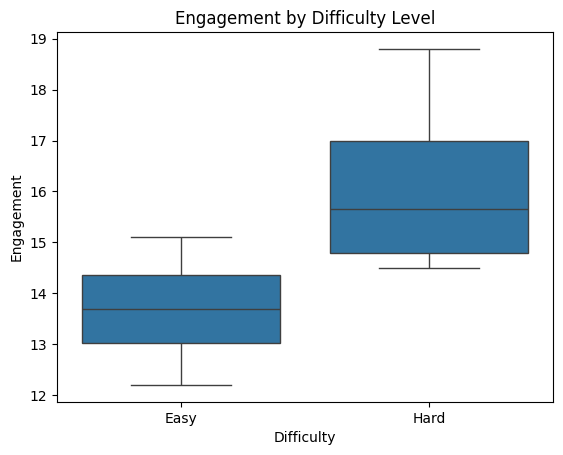

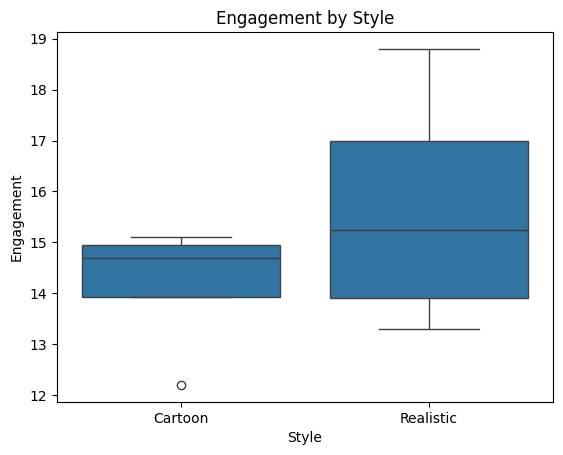

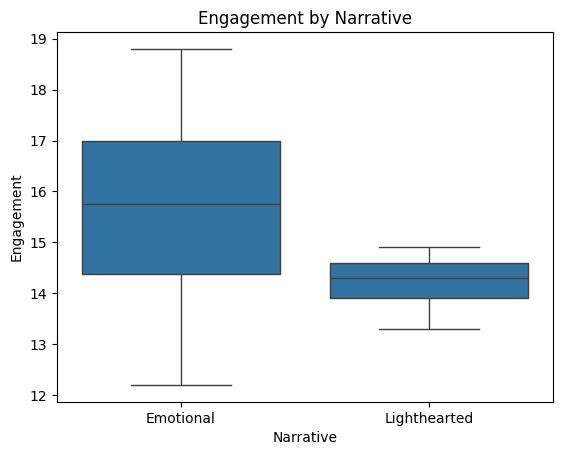

In [59]:
## Calculate Summary Statistics for the Main Effects ##

import seaborn as sns
import matplotlib.pyplot as plt

## Difficulty Effect ##

difficulty_effect = buster.groupby('Difficulty')['Engagement'].agg(['mean','std']).reset_index()

print(difficulty_effect)

## Style Effect ##

style_effect = buster.groupby('Style')['Engagement'].agg(['mean','std']).reset_index()

print(style_effect)

## Narrative Effect ##

narrative_effect = buster.groupby('Narrative')['Engagement'].agg(['mean','std']).reset_index()

print(narrative_effect)

## Plot Boxplots for Each Factor using seaborn ##

## Difficulty Boxplot ##

sns.boxplot(x='Difficulty', y='Engagement', data=buster)
plt.title('Engagement by Difficulty Level')
plt.show()

## Style Boxplot ##

sns.boxplot(x='Style', y='Engagement', data=buster)
plt.title('Engagement by Style')
plt.show()

## Narrative Boxplot ##
sns.boxplot(x='Narrative', y='Engagement', data=buster)
plt.title('Engagement by Narrative')
plt.show()


- So from what we see here, we can see that:
    1. The Easy game difficulty has a slightly lesser mean engagement time than the Hard game difficulty ($\approx 1.5\sigma$). The boxplot demonstrates a pretty clear separation between the two difficulty levels, which is also suggestive of a meaningful effect.
    2. For the Visual Style, we see that while they Realistic style games have a slightly greater mean engagement style (by about $1\sigma$) than the Cartoon-style games. The boxplot shows a lot of overlap between the two styles, which is suggestive of a negligible effect.
    3. Finally, we observe the Emotional style games have a greater mean engagement time than the lighthearted style games (by about $1\sigma$). The boxplot shows some separation between the two narrative depths, which may indicate a meaningful effect.

- Are these meaningful from a statistical or practical perspective? Let's take a look!


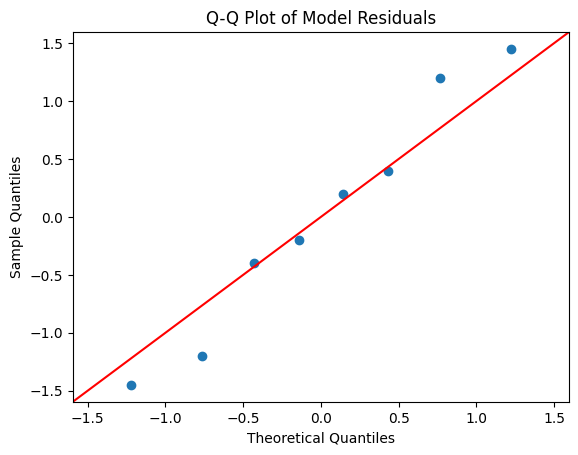

Shapiro-Wilk Test Statistic: 0.9570568649910762
p-value: 0.78164467767215


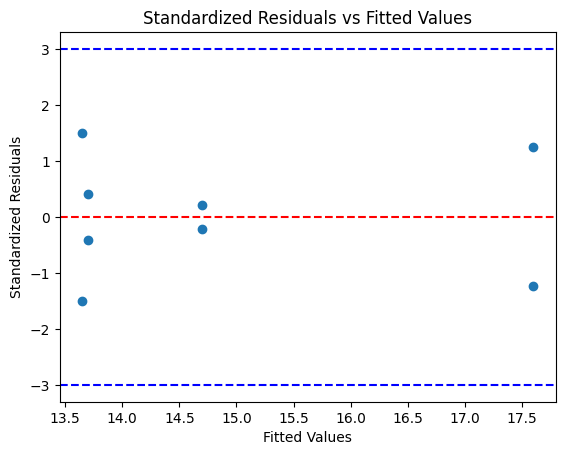

F-statistic: 1.1185670297103028e+28
F p-value: 2.6641257302062847e-56


In [60]:
## First, import ols function ##

from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

## Fit the Model ##

buster_mod = ols('Engagement ~ Difficulty + Style + Narrative', data=buster).fit()

## Extract Model Residuals ##

residuals = buster_mod.resid

## Use statsmodels to plot qqplot ##

sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Model Residuals')
plt.show()

## Run Shapiro-Wilk Test for Normality ##

shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_test.statistic}')
print(f'p-value: {shapiro_test.pvalue}')

## Generate Scatterplot of Standardized Residuals vs Fitted Values ##

standard_res = buster_mod.get_influence().resid_studentized_internal
fitted_vals = buster_mod.fittedvalues

plt.scatter(fitted_vals, standard_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='b', linestyle='--')
plt.axhline(y=-3, color='b', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Fitted Values')
plt.show()

## Perform Breusch-Pagan Test for Homoscedasticity ##

bp_test = het_breuschpagan(residuals, buster_mod.model.exog)

## Extract F-statistic ##

f_statistic = bp_test[2]

## Extract its P-Value ##

f_p_value = bp_test[3]

print(f"F-statistic: {f_statistic}")
print(f"F p-value: {f_p_value}")



- Examining normality:
    1. The Q-Q plot shows that the residuals are approximately normally distributed, with some minor deviations at the tails.
    2. The S-W test statistic's p-value is greater than our traditionally used 0.05 significance level, indicating that we fail to reject the null hypothesis of normality. In other words, the data support the assumption of normality.

- Examining homogeneity of variance:
    1. The residuals vs. fitted values plot shows:
        - No points above +3 or below -3.
        - An equal number of points above and below 0, suggesting that 0 may be a reasonable estimate of the overall mean of the residuals.
        - The heights of the vertical lines aren't exactly the same, but aren't wildly different either.
    2. The B-P test statistic's p-value is well less than 0.05, indicating that we reject the null hypothesis of homogeneity of variance. In other words, the data do not support the assumption of homogeneity of variance. 
        - However, since we have a small sample size, and since the heights of the lines aren't wildly different, we can cautiously proceed with our analysis, keeping in mind the potential violation of homogeneity of variance.

- Let's take a look at the overall results in the ANOVA table:

In [61]:
## Print the ANOVA table ##

print(sm.stats.anova_lm(buster_mod, typ=1))

             df    sum_sq   mean_sq         F    PR(>F)
Difficulty  1.0  12.25125  12.25125  6.547094  0.062722
Style       1.0   4.35125   4.35125  2.325317  0.201971
Narrative   1.0   4.06125   4.06125  2.170341  0.214691
Residual    4.0   7.48500   1.87125       NaN       NaN


- Here, none of our main effects are statistically significant at the $\alpha=0.05$ threshold! Let's take a look at our effect estimates (using the above equations) to see if any of our effects are practically significant:

In [62]:
## Group the Data by the Effect column and pivot from long to wide ##

df = (buster.groupby("Effect", as_index=False)["Engagement"].mean())

## Now we want to pivot the DataFrame from long to wide format
## so that each effect is a separate column ##

df = df.pivot_table(index=None, columns='Effect', values='Engagement').reset_index(drop=True)

## Extract factor columns for easier use ##

a   = df['a']
b   = df['b']
c   = df['c']
abc = df['abc']

## Compute factor estimates ##

df2 = pd.DataFrame({
    "A": 0.5 * (a - b - c + abc),
    "B": 0.5 * (-a + b - c + abc),
    "C": 0.5 * (-a - b + c + abc)
})

print(df)
print(df2)


Effect     a   abc     b      c
0       13.7  17.6  14.7  13.65
       A      B      C
0  1.475  2.475  1.425


- Cool! So what does this mean?
    - It is the exact same interpretation as the interpretation of the means!!

1.  As difficulty goes from the - level of Easy to the + level of hard, we expect an increase of 2.48 minutes.
2.  As visual style goes from the - level of Cartoon to the + level of Realistic, we expect an increase of 1.48 minutes.
3.  As narrative depth goes from the - level of Lighthearted to the + level of Emotional, we expect an increase of 1.43 minutes.

- Remember, we aren't able to distinguish between the main effects and the two-way interactions.

    - So, we need to be careful about our conclusions.

- If we were to run a second experiment with the opposite sign of the defining relation ($I=-ABC$), we could de-alias our main effects and two-way interactions.

    - This would allow us to estimate the main effects and two-way interactions separately.

- Lastly, let's calculate the partial $\eta^2$ for our main effects.

    - This will help us determine how much of the variance in the response variable is explained by each of the main effects.

In [63]:
## Calculate Partial Eta Squared for Each Factor ##

## Load pingouin ##

import pingouin as pg

## Fit ANOVA with pingouin ##

mod2 = pg.anova(data=buster, dv='Engagement', between=['Difficulty','Style','Narrative'], detailed=True)

print(mod2[["Source","np2"]][:3])


       Source       np2
0  Difficulty  0.620749
1       Style  0.367621
2   Narrative  0.351738


- This is telling us that the main effects of Difficulty, Style, and Narrative are accounting for 62.07%, 36.76%, and 35.17% of the variance in the response variable, respectively.

    - This is a pretty good amount of variance explained for a small sample size.

- All of these effects would be considered **large**.

    - This is a good example of ensuring that we don't solely rely on p-values to determine the importance of our factors.

## Final Thoughts

- So, in summary, we have learned about one-half fractional factorial designs and how to analyze them.

    - We have also learned about the alias structure of these designs and how to de-alias the main effects and two-way interactions using fold-over designs.

- We also learned that we have to be careful about our conclusions and not to solely rely on p-values as the measure of variable importance.

-  If we wanted to go a step further, we could take a one-quarter fractional factorial design, which would allow us to estimate the main effects and two-way interactions separately.

    -  This would be a more efficient design, but it would require more runs.